##abalone data 를 가지고 학습하기 

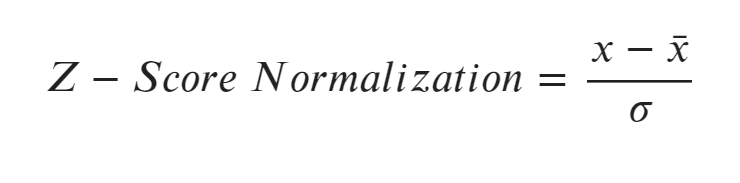

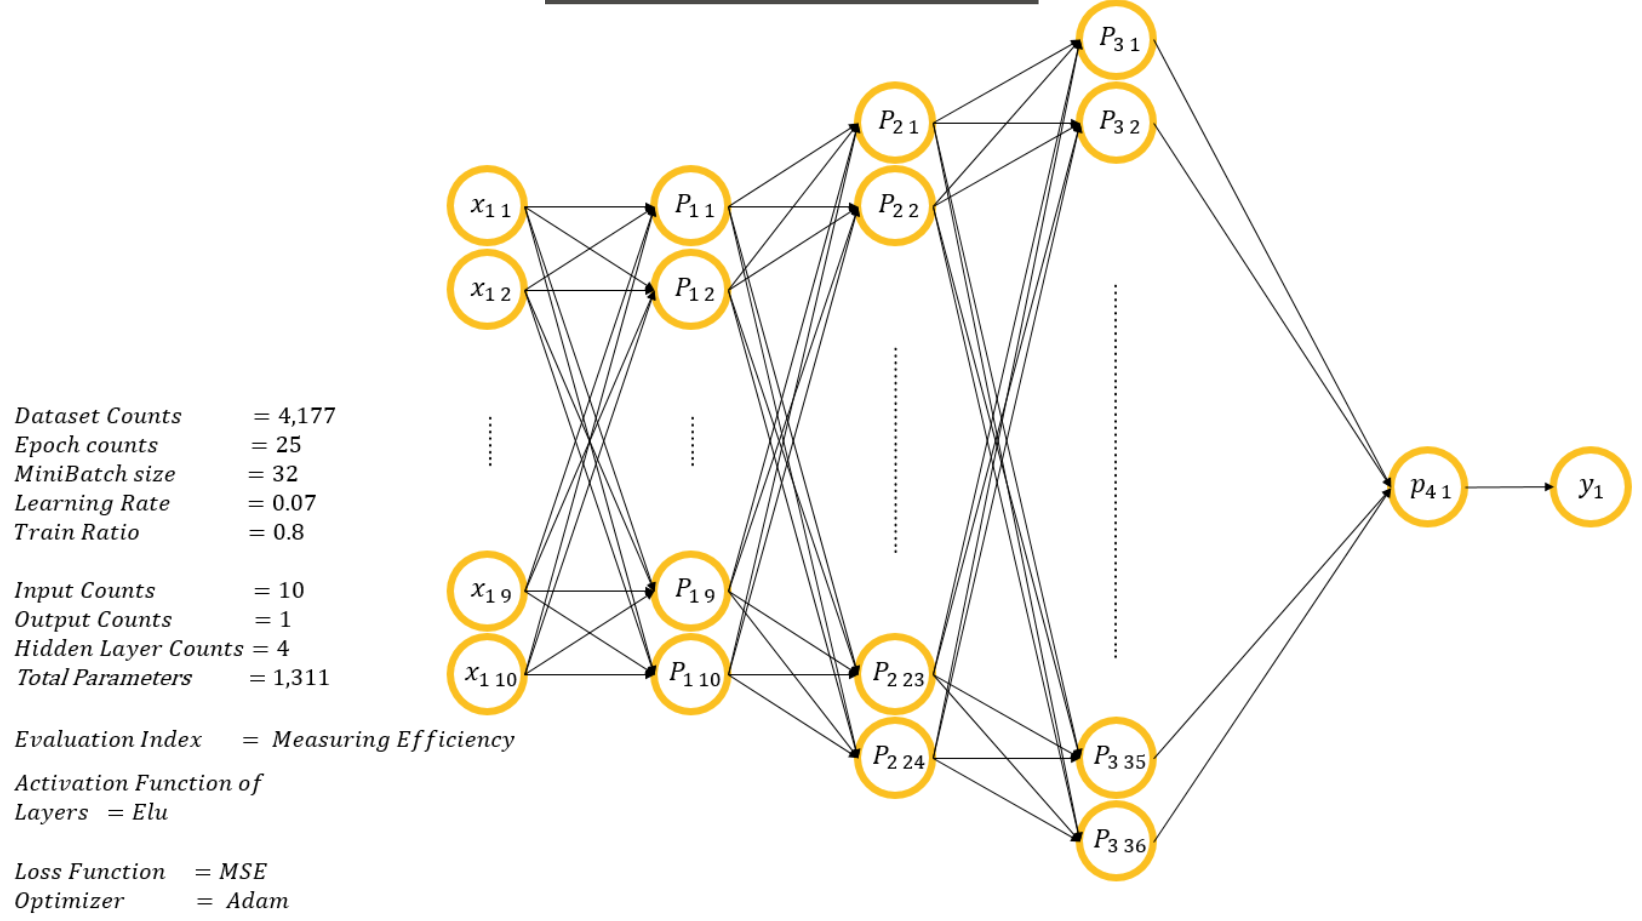

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/abalone.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.describe()
'''
데이터의 분포가 아주 잘되어있는 데이터는 
꼭 정규화를 시킬 필요는 없다.
데이터를 보고 그 방식에 맞는 정규화 를 해야 한다.
'''

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
import csv
#정규화 시키기 z score 정규화 
with open ('/content/abalone.csv') as csvf:
  csvreader = csv.reader(csvf)
  next(csvreader) #첫번쨰 값들을 건너 뛴다

  rows = []
  for row  in csvreader:
    rows.append(row)




In [6]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [7]:
input_cnt =10
output_cnt = 1

data = np.zeros([len(rows),input_cnt+output_cnt]) #행과 열의 개수가 맞춰진 버퍼 생성

print(data.shape)

(4177, 11)


In [8]:
#one hat vector 처리 
for n,r in enumerate(rows):
  if r[0] == 'M':
    data[n,0] =1 
  if r[0] == 'F':
    data[n,1] = 1
  if r[0] == 'I':
    data[n,2] = 1
  
  data[n,3 :] = r[1:]

In [9]:
data

array([[ 1.    ,  0.    ,  0.    , ...,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.261 ,  0.296 , 10.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.3765,  0.495 , 12.    ]])

In [10]:
#train_test_split
train_ratio = 0.8
train_idx = int(data.shape[0] * train_ratio)

print(train_idx)

3341


In [11]:
#shffle map
shffle_map = np.arange(data.shape[0])
np.random.shuffle(shffle_map)
print(shffle_map[:5])

[1454 1165 1538 1243 2569]


In [12]:
#train_test_split
train_data = data[shffle_map[:train_idx]]
print(train_data.shape)

test_data = data[shffle_map[train_idx:]]
print(test_data.shape)

(3341, 11)
(836, 11)


In [13]:
#독립 /종속 
train_x,train_y =train_data [:,:-output_cnt] ,train_data[:,-output_cnt:]
test_x,test_y  = test_data [:,:-output_cnt] , test_data[:,-output_cnt:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


In [51]:
#z 정규화 
'''
min_max_normalization 이 안먹히면 자주 씀 
x - x^ / 표준편차
분포가 제각각일 때 사용 
'''
train_x_mean = np.mean(train_x,axis = 0)
train_x_std = train_x.std(axis = 0)
train_x -=train_x_mean 
train_x /=train_x_std

print(train_x)

[[-0.75695146 -0.68169528  1.46288673 ... -1.05653903 -0.89111185
  -0.73992817]
 [-0.75695146  1.46693108 -0.68357992 ...  0.45904696  0.01777187
   0.01640495]
 [-0.75695146 -0.68169528  1.46288673 ... -1.26885659 -1.36850532
  -1.3341899 ]
 ...
 [ 1.32108867 -0.68169528 -0.68357992 ...  0.339336    0.48598469
   0.46300165]
 [-0.75695146 -0.68169528  1.46288673 ... -1.11074777 -1.34096339
  -0.93081224]
 [ 1.32108867 -0.68169528 -0.68357992 ... -0.12595568 -0.20256358
  -0.42659016]]


In [19]:
#학습데이터 의 평균과 표준편차를 이용하여 사용하는데 test 데이터 가 없다고 판단하고 train data 의 평균과 표준 편차를 사용한다
test_x -=train_x_mean
test_x /= train_x_std




In [21]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(units = 10,
                           activation = 'elu',
                           input_shape=(10,)),
     tf.keras.layers.Dense(units = 24,
                           activation = 'elu',
                           ),
     tf.keras.layers.Dense(units = 36,
                           activation = 'elu',
                           ),
     tf.keras.layers.Dense(units = 1), #활성화 함수는 범위를 제안 시키는 안좋은 케이스도 
    ]

)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss='mse')

'''
SGD
확률적 경사 하강법
배치크기 1 인 사이즈 로 경사 하강법을 쓴다
'''

'\nSGD\n확률적 경사 하강법\n배치크기 1 인 사이즈 로 경사 하강법을 쓴다\n'

In [42]:
history = model.fit(train_x,train_y,epochs = 25,batch_size=32,validation_split = 0.2)


'''
train  / test /validation

원래는 train test 만 썻는 데 
하나는 검증 validation 을 사용 

train  은 학습 에만 사용 하지만 
이것을 검증 할 때  = validation data 

test 데이터는 진짜 마지막에 신경망 테스트 를 할때 사용한다.
'''

Epoch 1/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9376 - val_loss: 8.8844
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9413 - val_loss: 9.4991
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9375 - val_loss: 8.7264
Epoch 4/25
84/84 [==============================] - 0s 3ms/step - loss: 10.9753 - val_loss: 9.5064
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 11.0537 - val_loss: 8.7184
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9257 - val_loss: 9.2580
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9292 - val_loss: 8.8385
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9161 - val_loss: 9.3496
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9686 - val_loss: 8.7406
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: 11.1516 - val_loss: 9.5097
Epoch 11/

'\ntrain  / test /validation\n\n원래는 train test 만 썻는 데 \n하나는 검증 validation 을 사용 \n\ntrain  은 학습 에만 사용 하지만 \n이것을 검증 할 때  = validation data \n\ntest 데이터는 진짜 마지막에 신경망 테스트 를 할때 사용한다.\n'

In [43]:
model.evaluate(test_x,test_y)

27/27 [==============================] - 0s 1ms/step - loss: 10.3565


10.35650634765625

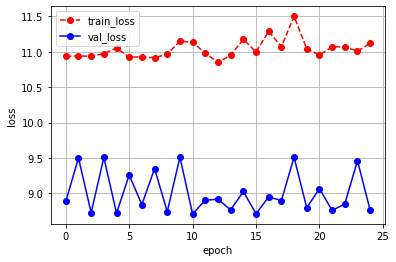

In [44]:
plt.plot(history.history['loss'],'--o',c = 'red',label = 'train_loss')
plt.plot(history.history['val_loss'], '-o', color = 'blue', label = 'val_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [45]:
pred_y = model.predict(test_x)
print(test_y[:10])

[[10.]
 [ 4.]
 [ 9.]
 [13.]
 [10.]
 [ 5.]
 [16.]
 [ 8.]
 [10.]
 [11.]]


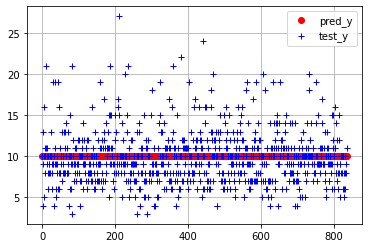

In [46]:
plt.plot(pred_y,'o',c = 'red',label = 'pred_y')
plt.plot(test_y,'+',c = 'blue',label = 'test_y')
plt.legend()
plt.grid()
plt.show()

In [48]:
#오차율 계산 
'''
1 -abs( Y- Y_MEAN / Y)
'''

acc = 1-np.abs((pred_y - test_y) / test_y) 



현재 모델의 정확도: [[  99.86194611]
 [ -49.65486526]
 [  89.0422821 ]
 [  76.81688162]
 [  99.86194611]
 [   0.27610779]
 [  62.41371632]
 [  75.17256737]
 [  99.86194611]
 [  90.78358737]
 [  90.78358737]
 [  47.55330767]
 [  99.86194611]
 [  90.78358737]
 [  89.0422821 ]
 [  99.86194611]
 [  33.56342316]
 [  75.17256737]
 [  89.0422821 ]
 [  75.17256737]
 [  89.0422821 ]
 [  99.86194611]
 [  75.17256737]
 [  76.81688162]
 [  99.86194611]
 [  99.86194611]
 [  75.17256737]
 [  89.0422821 ]
 [  33.56342316]
 [  52.558919  ]
 [  89.0422821 ]
 [  89.0422821 ]
 [  99.86194611]
 [ -49.65486526]
 [  90.78358737]
 [  89.0422821 ]
 [  52.558919  ]
 [   0.27610779]
 [  33.56342316]
 [  89.0422821 ]
 [  75.17256737]
 [  89.0422821 ]
 [  99.86194611]
 [  33.56342316]
 [  52.558919  ]
 [  75.17256737]
 [  62.41371632]
 [  33.56342316]
 [  75.17256737]
 [  75.17256737]
 [  90.78358737]
 [  89.0422821 ]
 [  99.86194611]
 [  99.86194611]
 [  57.34007699]
 [  76.81688162]
 [  89.0422821 ]
 [  99.86194611]
 [

In [50]:
print("현재 모델의 정확도: {}".format(acc*100))

현재 모델의 정확도: [[  99.86194611]
 [ -49.65486526]
 [  89.0422821 ]
 [  76.81688162]
 [  99.86194611]
 [   0.27610779]
 [  62.41371632]
 [  75.17256737]
 [  99.86194611]
 [  90.78358737]
 [  90.78358737]
 [  47.55330767]
 [  99.86194611]
 [  90.78358737]
 [  89.0422821 ]
 [  99.86194611]
 [  33.56342316]
 [  75.17256737]
 [  89.0422821 ]
 [  75.17256737]
 [  89.0422821 ]
 [  99.86194611]
 [  75.17256737]
 [  76.81688162]
 [  99.86194611]
 [  99.86194611]
 [  75.17256737]
 [  89.0422821 ]
 [  33.56342316]
 [  52.558919  ]
 [  89.0422821 ]
 [  89.0422821 ]
 [  99.86194611]
 [ -49.65486526]
 [  90.78358737]
 [  89.0422821 ]
 [  52.558919  ]
 [   0.27610779]
 [  33.56342316]
 [  89.0422821 ]
 [  75.17256737]
 [  89.0422821 ]
 [  99.86194611]
 [  33.56342316]
 [  52.558919  ]
 [  75.17256737]
 [  62.41371632]
 [  33.56342316]
 [  75.17256737]
 [  75.17256737]
 [  90.78358737]
 [  89.0422821 ]
 [  99.86194611]
 [  99.86194611]
 [  57.34007699]
 [  76.81688162]
 [  89.0422821 ]
 [  99.86194611]
 [